# Timeseries analysis

CFG

# Ubiquitous in Astronomy

Many processes are time variable, lightcurves reveal nature of dynamical evolution.


### Rotation


<img src = times/spots.jpg width = "450" > 

### Intrinsic Changes

![Accretion](times/accretion.jpg)



## Different systems


![Rotation](times/eyer.png)

## Different timescales


![Rotation](times/rotation.png)

# Analysis possible thanks to surveys


![Rotation](times/etendue.png)

Etendue = Area * F.O.V

##  Nature of lightcurve

![Rotation](times/timeseries.png)

and noise, spectral behaviour
$$S(f) = 1/f^\gamma$$

![Rotation](times/types_of_noise.jpg)


# Several different ways to analyze

- autocorrelation (statistics of time delay)
- periodicity (Fourier, periodogram)

# Check oscilating star
## Introduction


Check oscilation of:

1. **$\delta$ Scuti stars**: a class of oscillating stars typically 1.5 to 2.5 times as massive as the Sun, which oscillate due to fluctuations in the opacity of the outer layers of the star.
2. **Solar-Like Oscillators**: a class that includes all stars that oscillate in the same manner as the Sun, namely due to turbulent motion in the convective outer layers of their atmospheres. This includes both main sequence stars as well as red giant stars.

**Authors**: Oliver Hall (oliver.hall@esa.int), Geert Barentsen


In [35]:
import lightkurve as lk
%matplotlib inline

In [24]:
lk.search_lightcurve('HD 42608', mission='TESS')

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,SPOC,120,37498433,0.0
1,TESS Sector 06,2018,TESS-SPOC,1800,37498433,0.0
2,TESS Sector 06,2018,QLP,1800,37498433,0.0
3,TESS Sector 06,2018,TASOC,120,37498433,0.0
4,TESS Sector 06,2018,CDIPS,1800,37498433,0.0
5,TESS Sector 06,2018,GSFC-ELEANOR-LITE,1800,37498433,0.0
6,TESS Sector 06,2018,TASOC,1800,37498433,0.0
7,TESS Sector 06,2018,TASOC,1800,37498433,0.0
8,TESS Sector 06,2018,TGLC,1800,37498433,0.0


/Users/cfuentes/anaconda3/lib/python3.11/site-packages/lightkurve/search.py:423: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


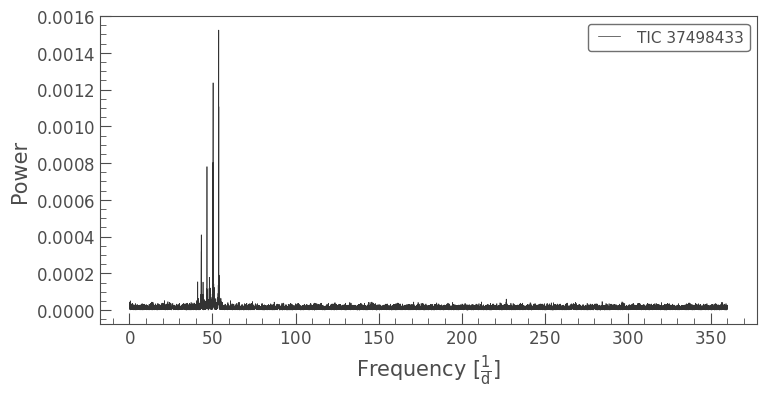

In [36]:
lc = lk.search_lightcurve('HD 42608', sector=6).download()
pg = lc.normalize().to_periodogram()
pg.plot();

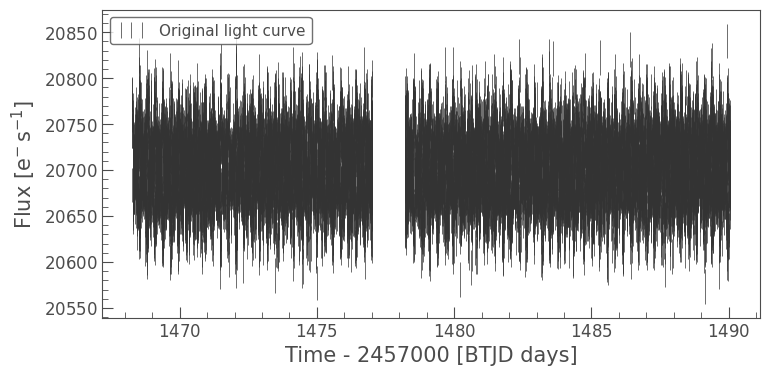

In [37]:
ax = lc.errorbar(label='Original light curve')

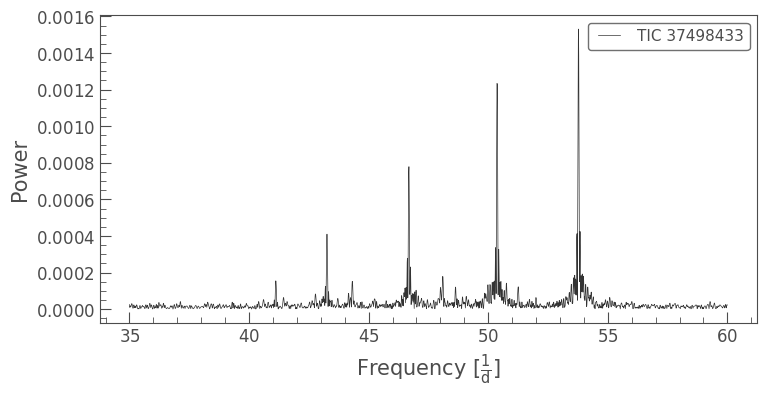

In [26]:
# Check the extra power near 1/50 day

pg = lc.normalize().to_periodogram(minimum_frequency=35,
                                   maximum_frequency=60)
pg.plot();


Stars of this type are known to display multiple types of oscillation, including:
- **Radial Oscillations**: caused by the star shrinking and expanding radially. Also called a "breathing mode."
- **Dipole Oscillations**: caused by the star's hemispheres shrinking and expanding alternately.

Both types of oscillations are on display in the figure above. Identifying exactly what type of oscillation a given peak represents is challenging. Fortunately, this star (HD 42608) is part of a set of stars for which the oscillations have been analyzed in detail in a research paper by [Bedding et al. (2020)](https://arxiv.org/pdf/2005.06157.pdf), so you can consult that paper to learn more about the details.

Note that the modes of oscillation are very "sharp" in the figure above. This is because $\delta$ Scuti oscillations are *coherent*, which is a term astronomers in the field use for signals that have long lifetimes and are not heavily damped. Because of this, their exact oscillation frequencies can be observed in a fairly straightforward way. This sets $\delta$ Scuti stars apart from solar-like oscillators, which are damped. Let's look at an example of such a star next.

# Now check oscillation of Sun-Like star

Let's have a look at the Sun-like star KIC 10963065 ([also known as Rudy](https://arxiv.org/pdf/1612.00436.pdf)), observed with *Kepler*. Because solar-like oscillation amplitudes are low, we will need to combine multiple quarters of data to improve our signal-to-noise.

We can list the available data sets as follows:

In [38]:

search_result = lk.search_lightcurve('KIC 10963065', mission='Kepler')
search_result


#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr010963065,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr010963065,0.0
2,Kepler Quarter 02,2009,Kepler,60,kplr010963065,0.0
3,Kepler Quarter 02,2009,Kepler,1800,kplr010963065,0.0
4,Kepler Quarter 03,2009,Kepler,1800,kplr010963065,0.0
5,Kepler Quarter 04,2010,Kepler,1800,kplr010963065,0.0
...,...,...,...,...,...,...
35,Kepler Quarter 15,2012,Kepler,60,kplr010963065,0.0
36,Kepler Quarter 15,2012,Kepler,60,kplr010963065,0.0


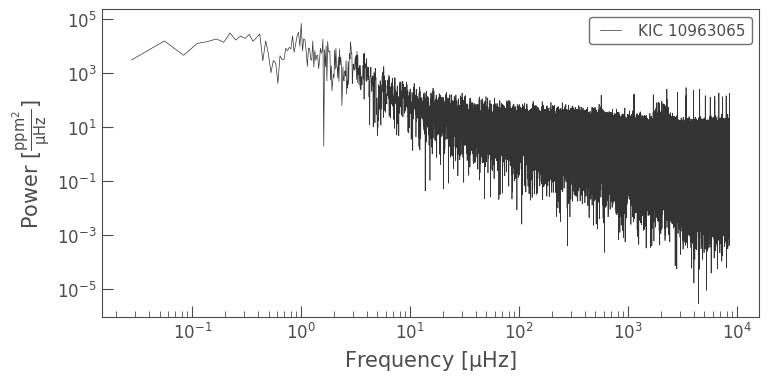

In [39]:
lc = search_result[0:10].download_all().stitch()
pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd')
pg.plot(scale='log');

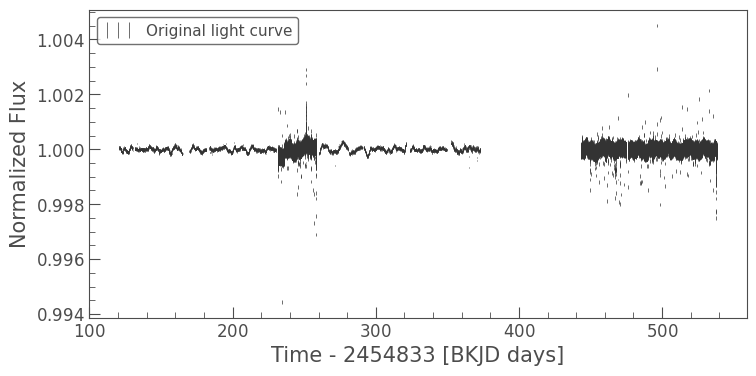

In [40]:
ax = lc.errorbar(label='Original light curve')

This periodogram looks very different to that of the $\delta$ Scuti star above. There is a lot of power excess at low frequencies: this is what we call the *convective background*, which is additional noise contributed by the convective surface of the star constantly changing. We do not see any clear peaks like we did for the $\delta$ Scuti oscillator however.

There is a good reason for this: this main sequence star oscillates at frequencies too large to be seen on this periodogram, lying above the periodogram's [Nyquist frequency](https://en.wikipedia.org/wiki/Nyquist_frequency).

The Nyquist frequency is a property of a time series that describes the maximum frequency that can be reliably determined in a periodogram. It stems from the assumption that you need a minimum of two observations per oscillation period to observe a pattern (one observation on the "up," and one on the "down" oscillation). It is defined as follows:

$\nu_{\rm nyq} = \frac{1}{2\Delta t}$ ,

where $\Delta t$ is the observing cadence.

The reason that we can't see Rudy's oscillations in the periodogram above is because we constructed this periodogram using the *Kepler* 30-minute Long Cadence data. Solar-like oscillators on the main sequence typically oscillate on the order of minutes (five minutes for the Sun), at frequencies much higher than will be visible on this periodogram. To see Rudy's oscillations, we will need to use the *Kepler* Short Cadence (SC) observations, which used a time sampling of one minute.  We can obtain these data as follows:

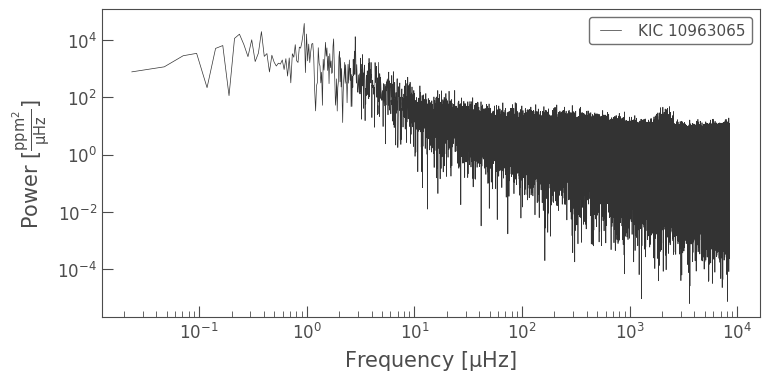

In [29]:
search_result = lk.search_lightcurve('KIC 10963065',
                                     mission='Kepler',
                                     cadence='short')
lc = search_result[0:10].download_all().stitch()
pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd')
pg.plot(scale='log');

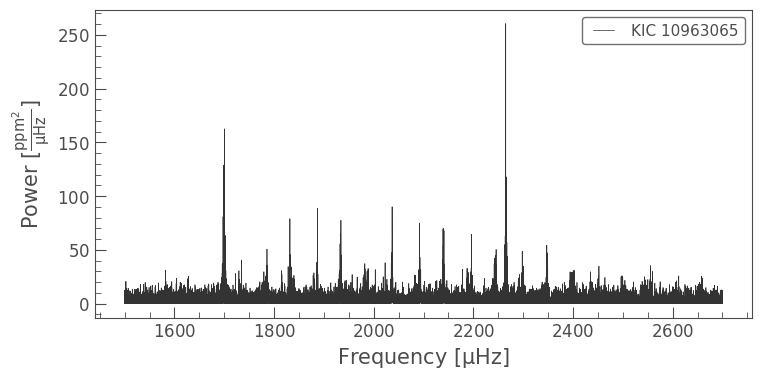

In [41]:
zoom_pg = lc.normalize(unit='ppm').to_periodogram(normalization='psd',
                                                  minimum_frequency=1500,
                                                  maximum_frequency=2700)
zoom_pg.plot();

# modifying and de-trending the periodogram

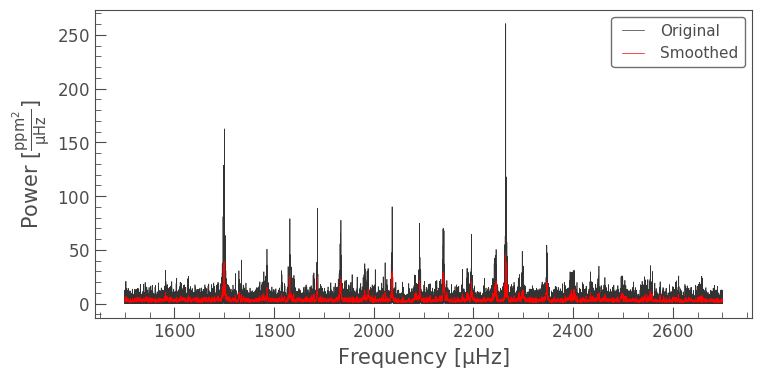

In [42]:
smooth_pg = zoom_pg.smooth(method='boxkernel', filter_width=0.5)
ax = zoom_pg.plot(label='Original')
smooth_pg.plot(ax=ax, color='red', label='Smoothed');

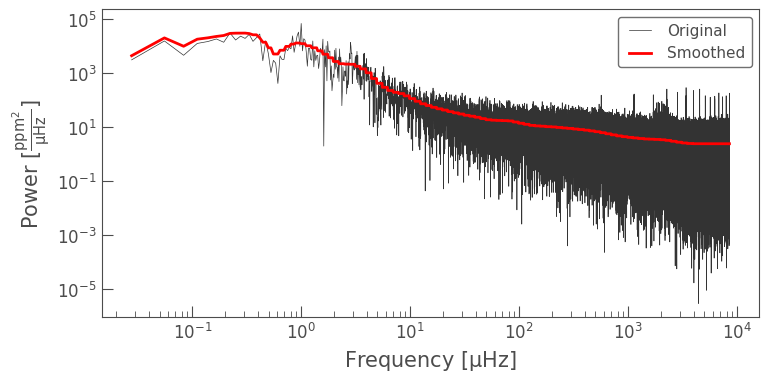

In [43]:
smooth_pg = pg.smooth(method='logmedian', filter_width=0.1)
ax = pg.plot(label='Original')
smooth_pg.plot(ax=ax, linewidth=2,  color='red', label='Smoothed', scale='log');

When studying modes of oscillation, it is typically preferred to remove the convective background. In a detailed analysis this would involve fitting a model to the background. As can be seen in the figure above, however, Lightkurve's log median smooth() method provides a useful first-order approximation of the background without the need for a model.


In [44]:

snrpg = pg.flatten()
snrpg

SNRPeriodogram(ID: KIC 10963065)

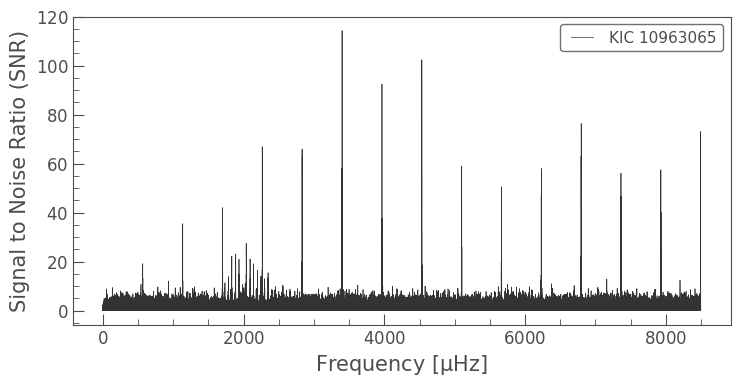

In [45]:
snrpg.plot();

# Other cool examples of varying phenomena
 like transits
 
 ## River plots
 **Authors:** Christina Hedges (christinalouisehedges@gmail.com), Nicholas Saunders (nksaun@hawaii.edu)

In [46]:
lc = lk.search_lightcurve('KIC 6185476', cadence='long').download_all().stitch()

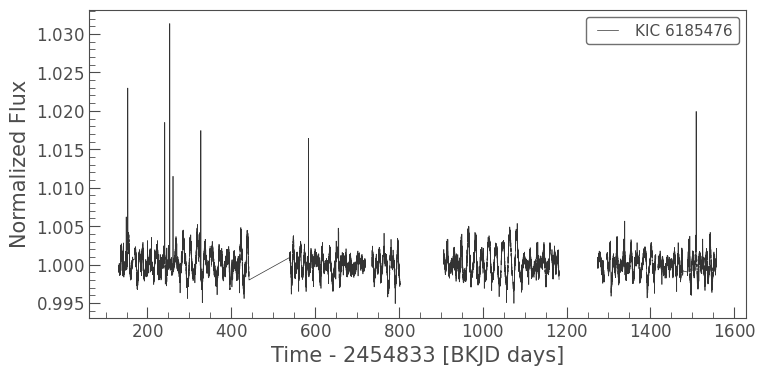

In [47]:
lc.plot();

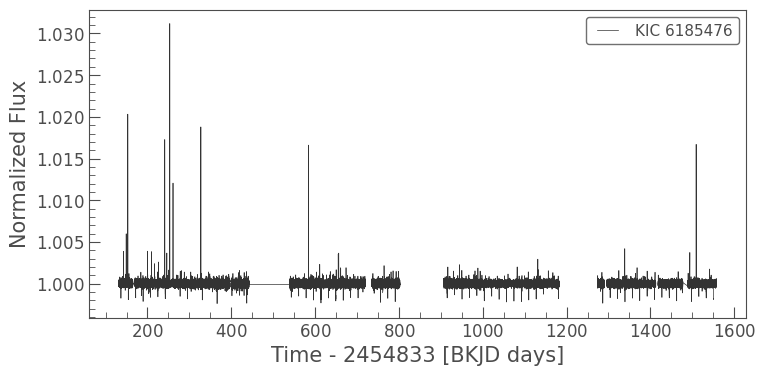

In [48]:
clc = lc.flatten(21)
clc.plot();

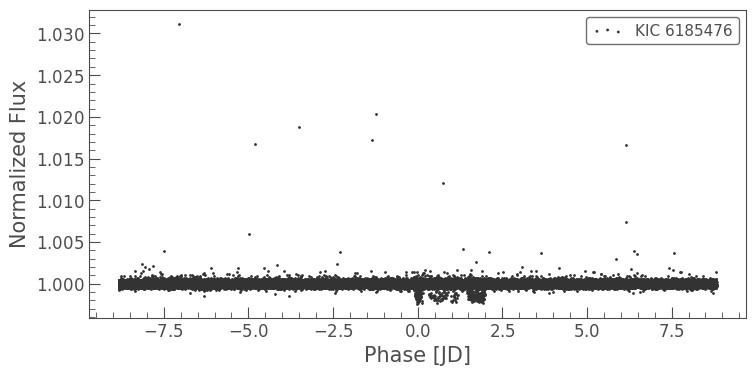

In [49]:
# Period (p) and and reference transit time (t0) are taken from the NASA Exoplanet Archive
p, t0 = 17.660114, 136.57258
folded_lc = clc.fold(period=p, epoch_time=t0)
folded_lc.scatter();

It looks like there is a concentration of points that are around phase of `0`, but they don't seem to line up nicely. This is caused by the transit of the planet occurring slightly before or after you would predict using a constant period. Cases of planets with meaningful TTVs are well suited for further analysis using a river plot.

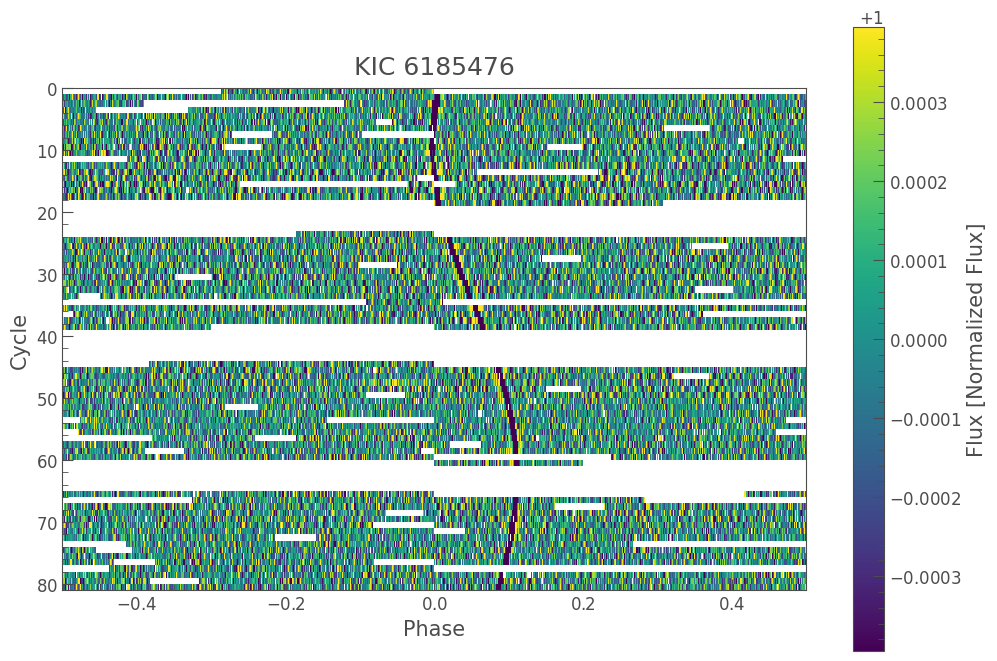

In [50]:
folded_lc.plot_river();

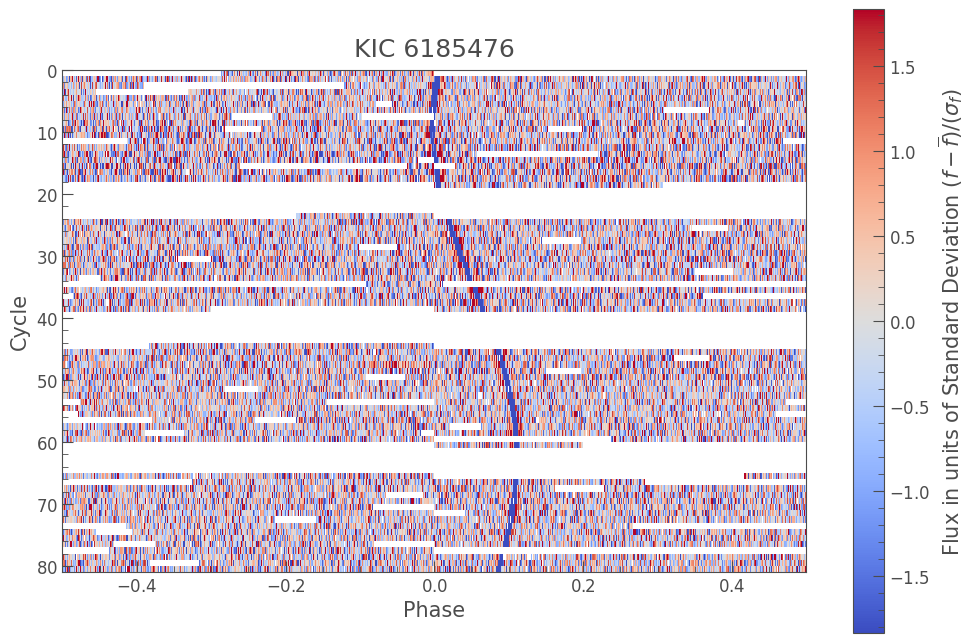

In [22]:
folded_lc.plot_river(bin_points=1, method='sigma');